In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

from prepare import train_validate_test_split
import prepare

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector


In [2]:
df = prepare.get_animal_data()

In [3]:
df.head()

,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
Animal ID,,,,,,,,,,,
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [ ]:
df.Color.value_counts()

In [4]:
df = prepare.prep_animal_data(df)

In [5]:
df.head()

,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age_upon_outcome,Breed,Color,...,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,,,,,,,,,
A794011,Chunk,2019-05-08 18:20:00,2019-05-01,2017-05-02,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,...,0,1,0,0,0,0,0,1,0,0
A776359,Gizmo,2018-07-18 16:02:00,2018-07-01,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,...,0,0,1,0,0,0,0,1,0,0
A821648,No_name,2020-08-16 11:38:00,2020-08-01,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,...,0,0,0,0,1,0,0,0,0,1
A720371,Moose,2016-02-13 17:59:00,2016-02-01,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,...,0,0,1,0,0,0,0,1,0,0
A674754,No_name,2014-03-18 11:47:00,2014-03-01,2014-03-12,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,...,0,1,0,0,0,0,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142750 entries, A794011 to A857750
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   Name                   142750 non-null  object         
 1   DateTime               142750 non-null  datetime64[ns] 
 2   MonthYear              142750 non-null  datetime64[ns] 
 3   DOB                    142750 non-null  datetime64[ns] 
 4   outcome                142750 non-null  object         
 5   animal_type            142750 non-null  object         
 6   sex                    142750 non-null  object         
 7   age_upon_outcome       142750 non-null  object         
 8   Breed                  142750 non-null  object         
 9   Color                  142750 non-null  object         
 10  year_born              142750 non-null  int64          
 11  current_age            142750 non-null  int64          
 12  age_bin                14039

In [8]:
#prepare.prep_animal_data(df)

In [9]:
train, validate, test = train_validate_test_split(df, target='Euthanasia')
train.shape, validate.shape, test.shape

((79940, 38), (34260, 38), (28550, 38))

Initial questions 

- what sex of animals is more likely to get euthi

- what animal type is more lkely to get euthi

- Does the age of the animal determine the euthinization

- what age are animals more likly to get adopted?

- what Breed is more likly to get adopted 



-  Some notes from the rubric :
You should ask questions of the data using natural language that speaks to the business stakeholders in markdown cells, ideally a header prior to the visualization or statistical test, that you then explore. 

3+ Statistical tests are utilized correctly (correct variables, conclusions drawn, no assumptions violated, and proper conclusions reached)

You may only call out a few of these features in the presentation, but having that there for reference is important in a report. A group of features may have the same reason why, and those can be mentioned together.

## Question 1 what animal type of animals is more likely to get euthi

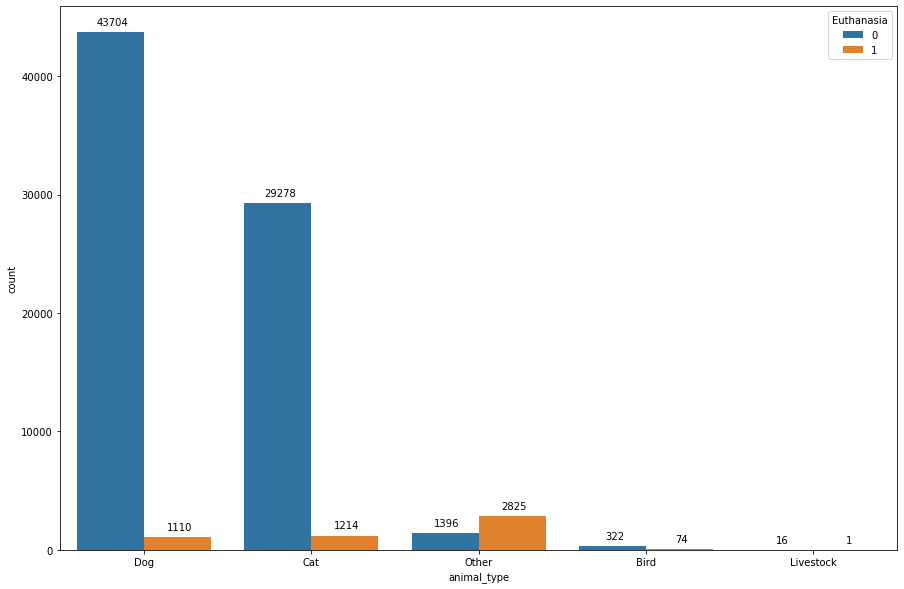

In [24]:
plt.figure(figsize=(15,10))
c = sns.countplot(train['animal_type'],hue=train['Euthanasia'])

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (2, 10),
                 textcoords = 'offset points')

$H_o$ : Animal_type and Euthanasia are independant

$H_a$ : There is a relationship between the animal type and Euthinasia

In [ ]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.animal_type, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   

## Question 1.2 What animal type is more likely to get adopted?

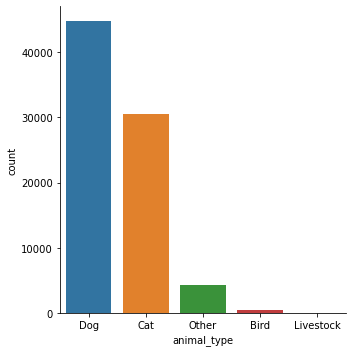

In [25]:
sns.catplot(x="animal_type", data=train, kind='count')

In [12]:
df.animal_type.value_counts()

Dog          80072
Cat          54430
Other         7542
Bird           680
Livestock       26
Name: animal_type, dtype: int64

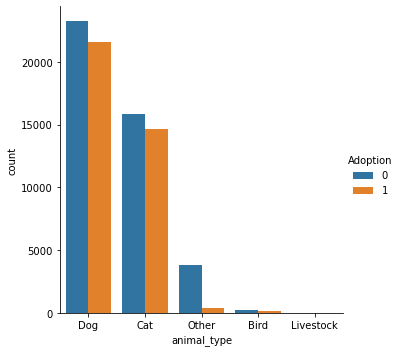

In [13]:
sns.catplot(x="animal_type",hue = 'Adoption', data=train, kind='count')

<Figure size 864x648 with 0 Axes>

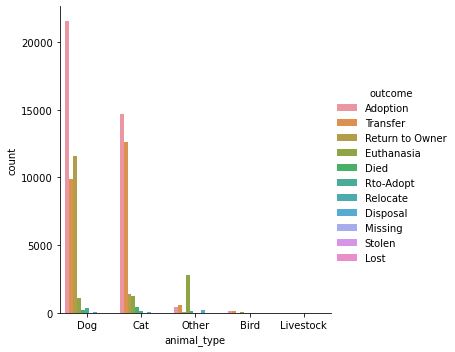

In [14]:
plt.figure(figsize=(12,9))
sns.catplot(x="animal_type",hue = 'outcome', data=train, kind='count')

## QUESTION 2 what sex of animals is more likely to get euthi

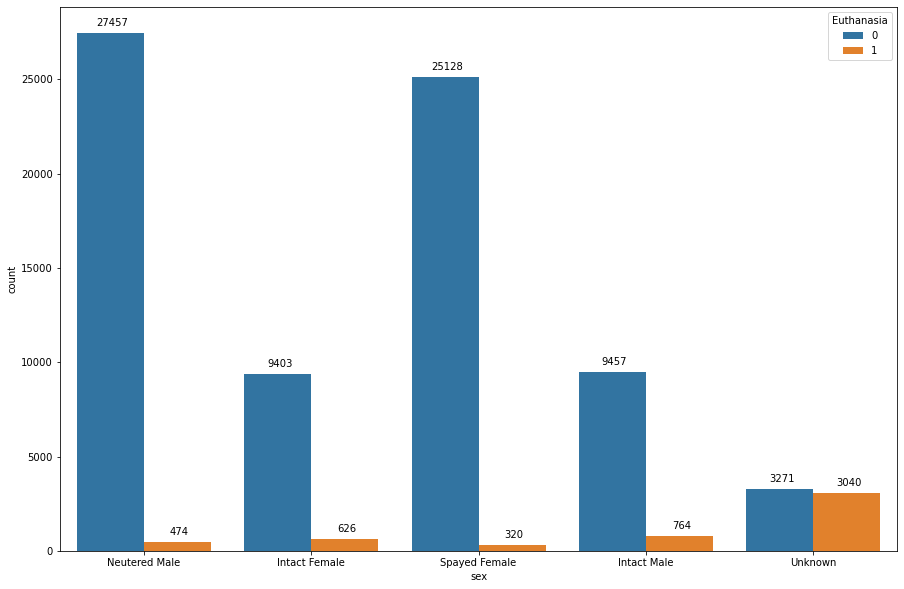

In [15]:
plt.figure(figsize=(15,10))
c = sns.countplot(train['sex'],hue=train['Euthanasia'])

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (2, 10),
                 textcoords = 'offset points')

$H_o$ : Sex and Euthanasia are independant

$H_a$ : There is a relationship between the animal sex and Euthinasia

In [16]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.sex, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   

Reject the null hypothesis


##  Question 3 -At what age are animals more likely to get euthanized ?

In [21]:
#df.info()

<AxesSubplot:xlabel='age_out_years', ylabel='count'>

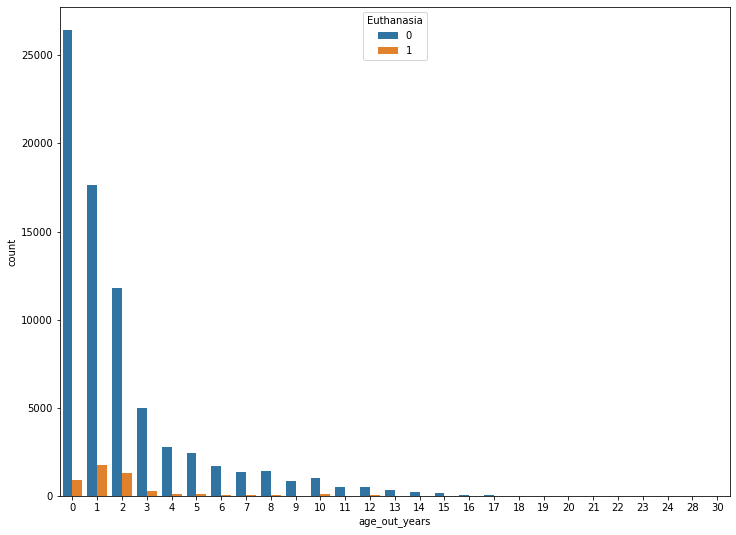

In [26]:
plt.figure(figsize=(12,9))
sns.countplot(x = train['age_out_years'] ,hue=train['Euthanasia'])

$H_o$ : the ages of the animals who are euthanized are equal to the ages of the animals that are not euthanized 

$H_a$ : the ages of the animals who are euthanized are not equal to the ages of the animals that are not euthanized

In [27]:
Euthanasia_sample = train[train.Euthanasia == 1 ].age
No_Euthanasia_sample = train[train.Euthanasia == 0 ].age

AttributeError: 'DataFrame' object has no attribute 'age'

In [ ]:
alpha = 0.05
#For this I did a T-statistical test becasue we are working with a categorical variable and a quatative variable 

t, p = stats.ttest_ind(Euthanasia_sample,No_Euthanasia_sample, equal_var=False)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

# question 4 - what are the diffrent outcomes for the diffrent animal types

<AxesSubplot:xlabel='outcome', ylabel='count'>

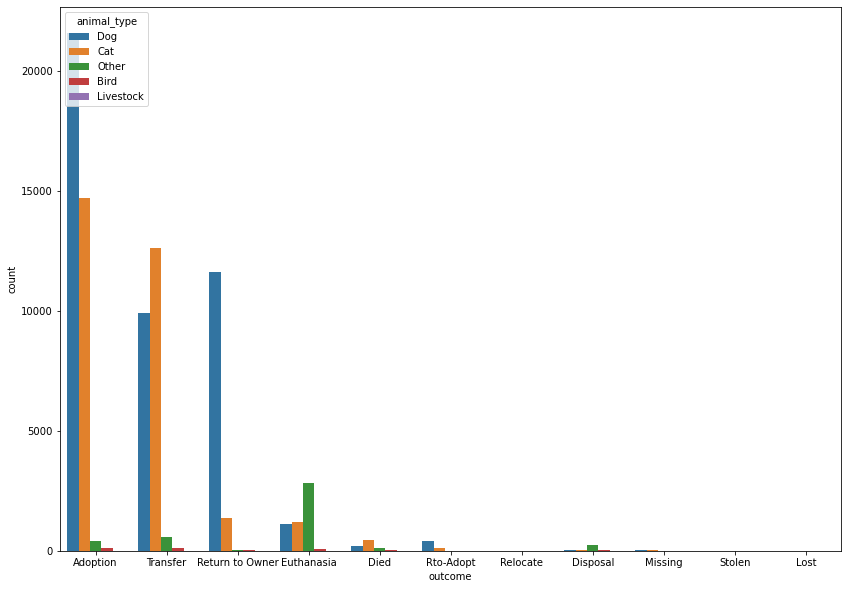

In [29]:
plt.figure(figsize=(14,10))
sns.countplot(x = train['outcome'] ,hue=train['animal_type'])

$H_o$ : animal type and outcome are independant

$H_a$ : There is a relationship between the animal type and independntn

In [ ]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.outcome, train.animal_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   

In [ ]:
# Question 5

$H_o$ : color and euthi are independant

$H_a$ : There is a relationship between the color and euthi

In [ ]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.Color, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   

In [ ]:
# Question 5 - Is there some sort of relationship between Breed and Euthinization 

In [ ]:
$H_o$ : color and euthi are independant

$H_a$ : There is a relationship between the color and euthi

In [30]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.Breed, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


# Modeling

feature engennering 

In [ ]:
# kbest = SelectKBest(f_regression, k=4)
# kbest.fit(X_train, y_train)

In [ ]:
# kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_), index=X_train.columns)
# kbest_results

In [ ]:
# X_train.columns[kbest.get_support()]

In [ ]:
# X_train_transformed = pd.DataFrame(
#     kbest.transform(X_train),
#     index=X_train.index,
#     columns=X_train.columns[kbest.get_support()]
# )
# X_train_transformed.head()

Notes from the rubrick 


- You clearly communicate how you evaluated and compared models. What metric(s) did you use and why? For example, in one case, you may decide to use precision over accuracy.

In [34]:
pd.set_option('display.max_columns', None)
train.head()

,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age_upon_outcome,Breed,Color,year_born,current_age,age_bin,year_released,age_out_years,Age_upon_out,days_old,Adoption,Died,Disposal,Euthanasia,Lost,Missing,Relocate,Return to Owner,Rto-Adopt,Stolen,Transfer,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A731965,*Elmer,2016-10-26 00:00:00,2016-10-01,2013-07-30,Adoption,Dog,Neutered Male,3 years,Pit Bull Mix,Blue/White,2013,9,over 5yrs,2016,3,1184 days 00:00:00,1184,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
A817802,No_name,2020-06-01 15:26:00,2020-06-01,2019-05-26,Transfer,Dog,Neutered Male,1 year,Dachshund/Chihuahua Shorthair,Black,2019,3,below 5yrs,2020,1,372 days 15:26:00,372,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
A811391,Holly,2020-01-03 13:08:00,2020-01-01,2011-01-03,Return to Owner,Dog,Intact Female,9 years,Boxer,White,2011,11,over 10yrs,2020,9,3287 days 13:08:00,3287,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
A692819,Spider,2016-03-22 12:56:00,2016-03-01,2012-11-26,Euthanasia,Dog,Neutered Male,3 years,American Staffordshire Terrier Mix,Black/White,2012,10,over 5yrs,2016,4,1212 days 12:56:00,1212,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
A704896,Drogo,2015-06-16 16:59:00,2015-06-01,2013-06-10,Adoption,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Brown/White,2013,9,over 5yrs,2015,2,736 days 16:59:00,736,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [35]:
#df.info()

## creating a baseline

In [68]:
X_train = train.drop(columns=['Name','DateTime','MonthYear','age_upon_outcome','DOB', 'age_bin', 'outcome','animal_type','sex','Euthanasia', 'Adoption', 'Died', 'Disposal', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt','Stolen','Transfer','age_out_years','current_age','Age_upon_out','Breed','Color'])
y_train = train[['Euthanasia']]

X_validate = validate.drop(columns=['Name','DateTime','MonthYear','DOB', 'age_bin','outcome','animal_type','sex','Euthanasia', 'Adoption', 'Died', 'Disposal', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt','Stolen','Transfer','age_out_years','current_age','age_upon_outcome','Age_upon_out','Breed','Color'])
y_validate = validate[['Euthanasia']]

X_test = test.drop(columns=['Name','DateTime','MonthYear','DOB', 'age_bin','outcome','animal_type','sex','Euthanasia', 'Adoption', 'Died', 'Disposal', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt','Stolen', 'Transfer','age_out_years','current_age','age_upon_outcome','Breed','Color','Age_upon_out'])
y_test = test[['Euthanasia']]

In [69]:
X_train.head()

,year_born,year_released,days_old,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,
A731965,2013,2016,1184,0,0,1,0,0,0,0,1,0,0
A817802,2019,2020,372,0,0,1,0,0,0,0,1,0,0
A811391,2011,2020,3287,0,0,1,0,0,1,0,0,0,0
A692819,2012,2016,1212,0,0,1,0,0,0,0,1,0,0
A704896,2013,2015,736,0,0,1,0,0,0,0,1,0,0


In [70]:
X_validate.head()

,year_born,year_released,days_old,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,
A853016,2020,2022,730,0,0,1,0,0,1,0,0,0,0
A734692,2016,2016,66,0,1,0,0,0,0,0,0,1,0
A726952,2014,2016,732,0,0,1,0,0,0,0,1,0,0
A707765,2015,2015,84,0,1,0,0,0,0,0,0,1,0
A726513,2003,2016,4752,0,0,1,0,0,0,1,0,0,0


In [54]:
baseline_accuracy = (train.Euthanasia == 0).mean()
print(f"baseline_accuracy: {round(baseline_accuracy, 2)}")

baseline_accuracy: 0.93


In [55]:
train.Euthanasia.value_counts()

0    74716
1     5224
Name: Euthanasia, dtype: int64

In [56]:
#train.head()

In [57]:
#df.info()

## Decision Tree 

In [58]:
X_train.head()


,year_born,year_released,days_old,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,
A731965,2013,2016,1184,0,0,1,0,0,0,0,1,0,0
A817802,2019,2020,372,0,0,1,0,0,0,0,1,0,0
A811391,2011,2020,3287,0,0,1,0,0,1,0,0,0,0
A692819,2012,2016,1212,0,0,1,0,0,0,0,1,0,0
A704896,2013,2015,736,0,0,1,0,0,0,0,1,0,0


In [71]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

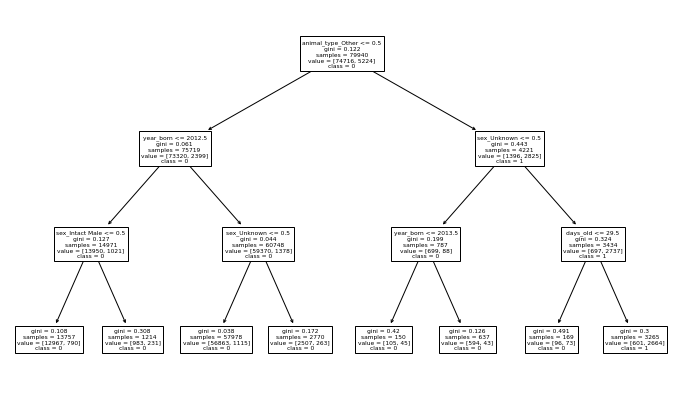

In [72]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [73]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.96


In [74]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     74716
           1       0.82      0.51      0.63      5224

    accuracy                           0.96     79940
   macro avg       0.89      0.75      0.80     79940
weighted avg       0.96      0.96      0.96     79940



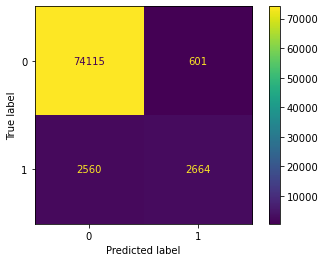

In [75]:
plot_confusion_matrix(tree1, X_train, y_train)

In [76]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                      0            1  accuracy     macro avg  weighted avg
precision      0.968317     0.669273  0.952527      0.818795      0.948775
recall         0.981316     0.540773  0.952527      0.761045      0.952527
f1-score       0.974773     0.598200  0.952527      0.786487      0.950164
support    74716.000000  5224.000000  0.952527  79940.000000  79940.000000

Tree with max depth of 2
                      0            1  accuracy     macro avg  weighted avg
precision      0.967493     0.797030   0.96017      0.882261      0.956353
recall         0.990671     0.523928   0.96017      0.757300      0.960170
f1-score       0.978945     0.632248   0.96017      0.805596      0.956289
support    74716.000000  5224.000000   0.96017  79940.000000  79940.000000

Tree with max depth of 3
                      0            1  accuracy     macro avg  weighted avg
precision      0.966612     0.815926  0.960458      0.891269      0.956765
recall         0.991956

In [77]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.952527,0.953327,-0.000801
1,2,0.960170,0.960158,0.000013
2,3,0.960458,0.959982,0.000475
3,4,0.960721,0.960450,0.000271
4,5,0.961308,0.960654,0.000655
5,6,0.961746,0.961325,0.000421
6,7,0.962584,0.961296,0.001288
7,8,0.963373,0.960887,0.002485
8,9,0.964498,0.961062,0.003436
9,10,0.965424,0.960800,0.004624


## This is the best model with a max depth of 3

## Random forest

In [78]:
rf = RandomForestClassifier(max_depth=3, 
                            random_state=123)


In [79]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [80]:
print(rf.feature_importances_)

[1.03926211e-02 6.74027090e-03 2.69059441e-02 1.06083261e-03
 6.50956869e-02 4.99591091e-02 1.18448660e-05 4.50902682e-01
 5.17711134e-03 1.30410592e-02 2.91256835e-02 5.18735772e-02
 2.89713577e-01]


In [81]:
y_pred = rf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [82]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.97512909, 0.02487091],
       [0.97765543, 0.02234457],
       [0.95253544, 0.04746456],
       ...,
       [0.97620071, 0.02379929],
       [0.96607814, 0.03392186],
       [0.9740638 , 0.0259362 ]])

In [83]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.96


In [84]:
print(confusion_matrix(y_train, y_pred))

[[74019   697]
 [ 2487  2737]]


In [85]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     74716
           1       0.80      0.52      0.63      5224

    accuracy                           0.96     79940
   macro avg       0.88      0.76      0.81     79940
weighted avg       0.96      0.96      0.96     79940



In [86]:
#validate

In [87]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.96


In [88]:
for i in range(1, 10):
    # Make the model
    rf = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    rftree = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    rfy_predictions = rftree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, rfy_predictions, output_dict=True)
    print(f"Random Forest with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Random Forest with max depth of 1
                      0       1  accuracy     macro avg  weighted avg
precision      0.934651     0.0  0.934651      0.467325      0.873572
recall         1.000000     0.0  0.934651      0.500000      0.934651
f1-score       0.966222     0.0  0.934651      0.483111      0.903080
support    74716.000000  5224.0  0.934651  79940.000000  79940.000000

Random Forest with max depth of 2
                      0            1  accuracy     macro avg  weighted avg
precision      0.961441     0.829394  0.956968      0.895418      0.952812
recall         0.993817     0.429939  0.956968      0.711878      0.956968
f1-score       0.977361     0.566314  0.956968      0.771837      0.950499
support    74716.000000  5224.000000  0.956968  79940.000000  79940.000000

Random Forest with max depth of 3
                      0            1  accuracy     macro avg  weighted avg
precision      0.967493     0.797030   0.96017      0.882261      0.956353
recall         0.9906

##  KNN modeling

In [89]:
baseline_accuracy = (train.Euthanasia == 0).mean()
print(f"baseline_accuracy: {round(baseline_accuracy, 2)}")

baseline_accuracy: 0.93


In [90]:
knn1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [91]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
y_pred = knn1.predict(X_train)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [93]:
y_train[:5]

,Euthanasia
Animal ID,
A731965,0
A817802,0
A811391,0
A692819,1
A704896,0


In [94]:
y_pred_proba = knn1.predict_proba(X_train)
y_pred_proba[:5]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ]])

In [95]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.97


In [96]:
print(confusion_matrix(y_train, y_pred))

[[74023   693]
 [ 1921  3303]]


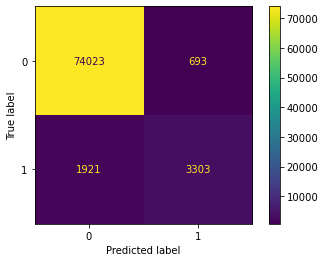

In [97]:
plot_confusion_matrix(knn1, X_train, y_train)

In [98]:
print('Accuracy of KNN (k=3) classifier on validate set: {:.2f}'
     .format(knn1.score(X_validate, y_validate)))

Accuracy of KNN (k=3) classifier on validate set: 0.96


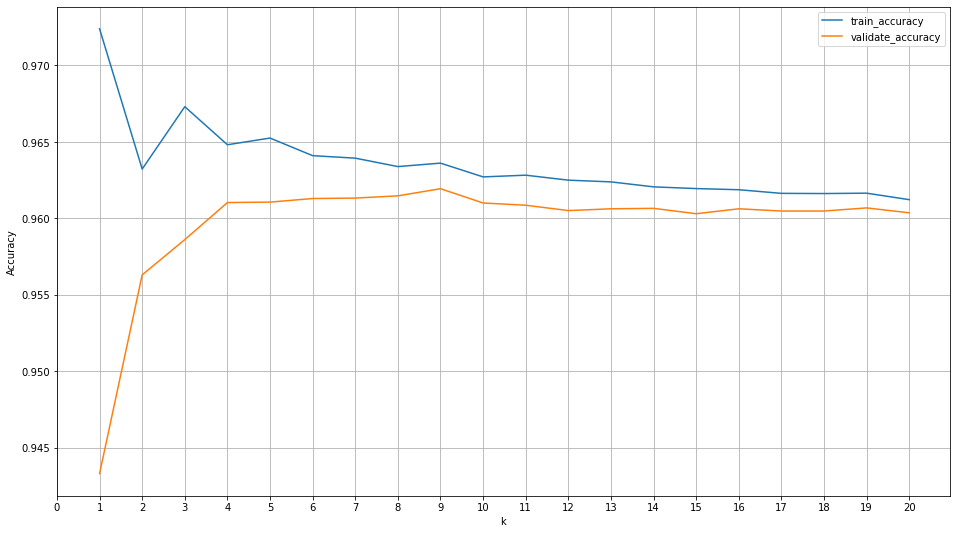

In [99]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [100]:
knn6 = KNeighborsClassifier(n_neighbors=6, weights='uniform')

In [101]:
knn6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [102]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn6.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.96


In [103]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn6.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.96


## Logistic Regression model

In [104]:
logit = LogisticRegression(C=1, random_state=123)

In [105]:
#  fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [106]:
y_pred = logit.predict(X_train)

In [107]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [108]:
# look at probability of being in certain class for each observation
logit.predict_proba(X_train)[:10]

array([[0.98769235, 0.01230765],
       [0.99206451, 0.00793549],
       [0.85482696, 0.14517304],
       [0.9872834 , 0.0127166 ],
       [0.9902753 , 0.0097247 ],
       [0.96867295, 0.03132705],
       [0.93981761, 0.06018239],
       [0.9753486 , 0.0246514 ],
       [0.992358  , 0.007642  ],
       [0.95070313, 0.04929687]])

In [109]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     74716
           1       0.78      0.53      0.63      5224

    accuracy                           0.96     79940
   macro avg       0.87      0.76      0.81     79940
weighted avg       0.96      0.96      0.96     79940



In [110]:
# i tried .05, 2 ,.5 and they all said 96%

In [111]:
logit1 = LogisticRegression(C=0.05, random_state=123)

In [112]:
logit1.fit(X_train, y_train)

LogisticRegression(C=0.05, random_state=123)

In [113]:
y_pred1 = logit1.predict(X_train)

In [114]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [115]:
logit1.predict_proba(X_train)[:10]

array([[0.98686438, 0.01313562],
       [0.99143653, 0.00856347],
       [0.85830681, 0.14169319],
       [0.98642687, 0.01357313],
       [0.98955746, 0.01044254],
       [0.96733594, 0.03266406],
       [0.94019078, 0.05980922],
       [0.97413558, 0.02586442],
       [0.99162407, 0.00837593],
       [0.95078189, 0.04921811]])

In [116]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     74716
           1       0.78      0.53      0.63      5224

    accuracy                           0.96     79940
   macro avg       0.88      0.76      0.81     79940
weighted avg       0.96      0.96      0.96     79940

